In [19]:
import imageio
import glob
import sys
import os
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.util.shape import view_as_windows
import numpy as np

IMG_CHANNELS = 3
IMG_HEIGHT = 64
IMG_WIDTH = 64
samples = [file for file in glob.glob('data/images/*.tif')]

In [21]:
print('Splitting sample images ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(samples), total=len(samples)):
    
    img = imread(id_)[:,:,:IMG_CHANNELS]
    window_shape = (IMG_HEIGHT, IMG_WIDTH,3)
    B = view_as_windows(img[50:950,50:950,:], window_shape, 30)
#    for i in range(0,16):
#        for j in range(0,16):
#            tmp_path=os.path.join('data','images','tmp',os.path.basename(id_)[:-4] + "-%s-%s.png" % (i,j))
#            imageio.imwrite(tmp_path, B[i,j,0])

    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

    mask_ = np.load('data/masks/' + os.path.basename(id_)[:-4] + '.npy')
    mask_window_shape = (IMG_HEIGHT, IMG_HEIGHT)
    C = view_as_windows(mask_, mask_window_shape, 30)
    for i in range(0,16):
        for j in range(0,16):
            tmp_path=os.path.join('data','masks','tmp',os.path.basename(id_)[:-4] + "-%s-%s.npy" % (i,j))
            np.save(tmp_path, C[i,j])
    #mask = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',
    #                             preserve_range=True), axis=-1)
    #Y_train[n] = mask

Splitting sample images ... 


  0%|          | 0/30 [00:00<?, ?it/s]/usr/lib/python3/dist-packages/skimage/util/shape.py:247: RuntimeWarning: Cannot provide views on a non-contiguous input array without copying.
  warn(RuntimeWarning("Cannot provide views on a non-contiguous input "
 27%|██▋       | 8/30 [00:01<00:02,  7.79it/s]/usr/lib/python3/dist-packages/skimage/external/tifffile/tifffile.py:2573: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  tile = decompress(tile)
/usr/lib/python3/dist-packages/skimage/external/tifffile/tifffile.py:2579: UserWarning: invalid tile data
  warnings.warn("invalid tile data")
100%|██████████| 30/30 [00:04<00:00,  7.33it/s]


In [13]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np

ia.seed(1)

# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images = np.array(
    [ia.quokka(size=(64, 64)) for _ in range(32)],
    dtype=np.uint8
)

seq = iaa.Sequential([
    
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2)
    
], random_order=True) # apply augmenters in random order

images_aug = seq.augment_images(images)

/usr/lib/python3/dist-packages/scipy/misc/pilutil.py:480: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/lib/python3/dist-packages/scipy/misc/pilutil.py:483: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


32


/usr/lib/python3/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


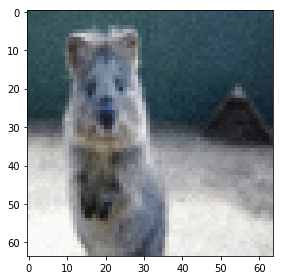

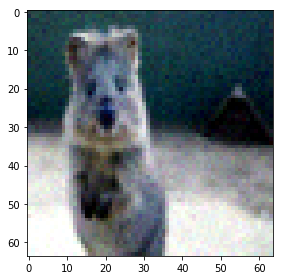

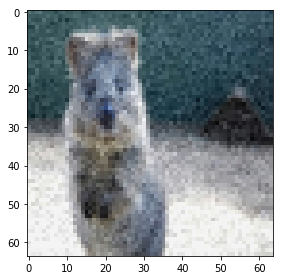

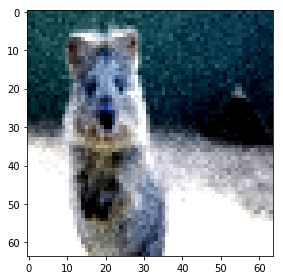

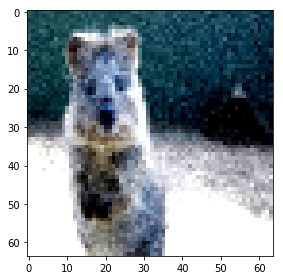

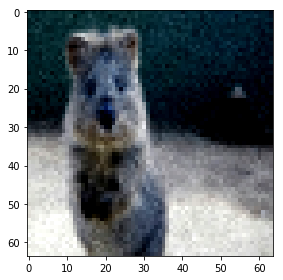

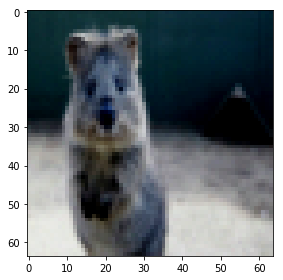

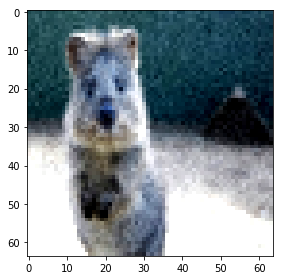

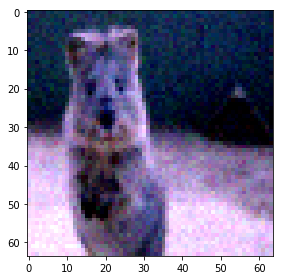

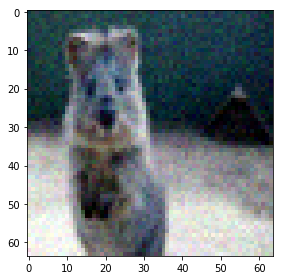

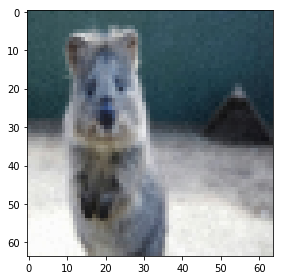

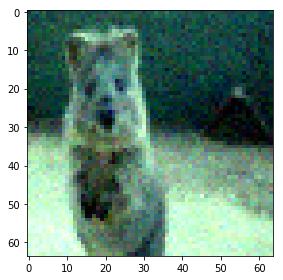

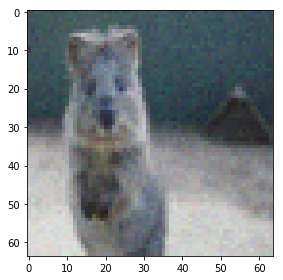

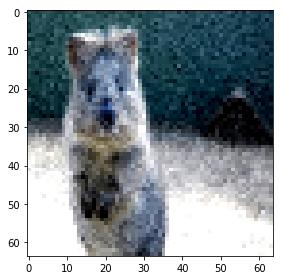

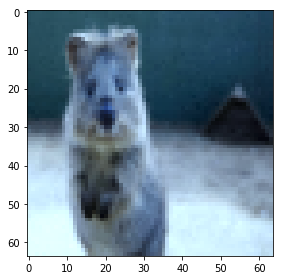

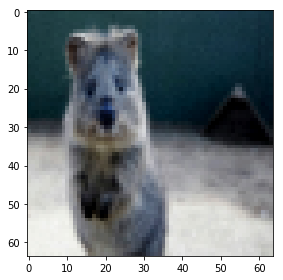

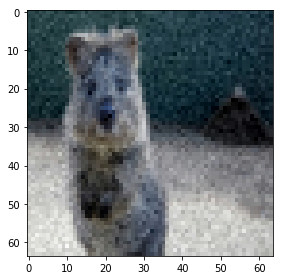

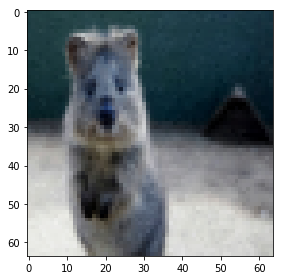

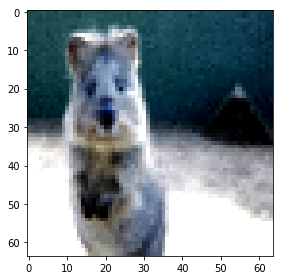

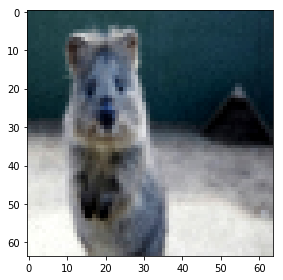

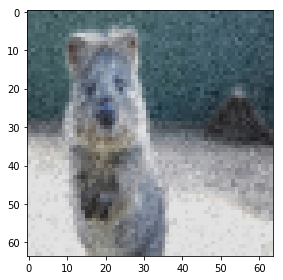

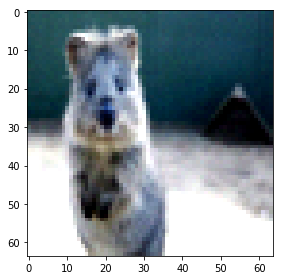

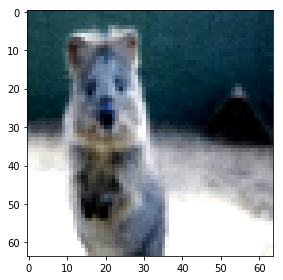

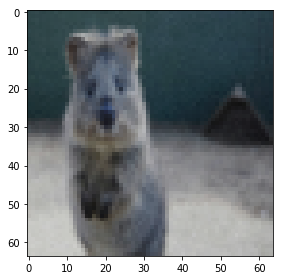

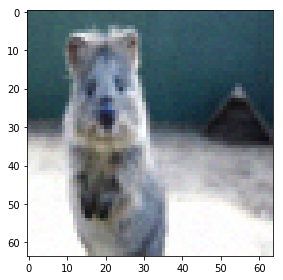

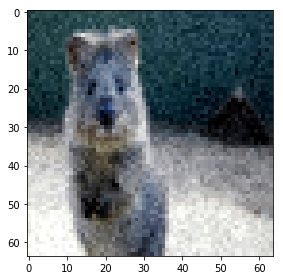

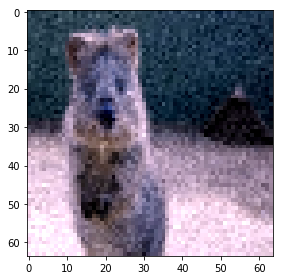

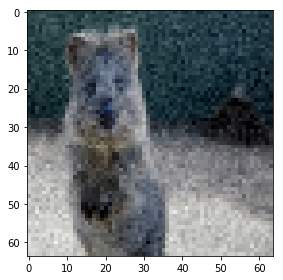

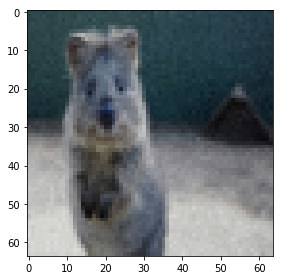

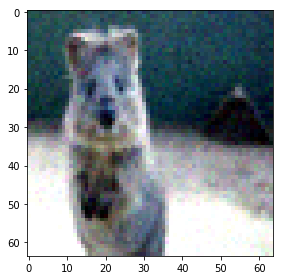

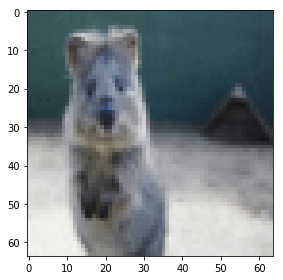

In [14]:
images_aug
print(len(images_aug))

for i in range(0,len(images_aug)-1):
    imshow(images_aug[i])
    plt.show()
